In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
file_path = 'googlerestaurants.json'
with open(file_path, 'r') as file:
    data = json.load(file)
    
# Convert to DataFrame
df = pd.json_normalize(data['train'])

# Display the first few rows
print(df.head())


                business_id                user_id  rating  \
0  60567465d335d0abfb415b26  101074926318992653684       4   
1  6050fa9f5b4ccec8d5cae994  117065749986299237881       5   
2  604be10877e81aaed3cc9a1e  106700937793048450809       4   
3  60411e017cd8bf130362365a  101643045857250355161       5   
4  604139dd7cd8bf1303624208  109802745326785766951       4   

                                         review_text  \
0  The tang of the tomato sauce is outstanding. A...   
1              Chicken and waffles were really good!   
2  The appetizer of colossal shrimp was very good...   
3  The fish tacos here  omg! The salad was great ...   
4  Ribs are great, as are the mac and cheese, fri...   

                                                pics  \
0  [AF1QipM-2IRmvitARbcJr7deWfe5hyVBg_ArPMQSYvq0,...   
1     [AF1QipMpfxIZUT_aymQ3qPGO-QgGYzxbtLZGmHufAp2s]   
2  [AF1QipMNnqM5X9sSyZ9pXRZ1jvrURHN9bZhGdzuEXoP8,...   
3  [AF1QipM-a6AGGp4Hgk5RD0gY5sDRp5kEfB1hZLvlRkft,...   
4     [AF1

In [4]:
# Basic statistics for the rating column
rating_stats = df['rating'].describe()
print("Rating Statistics:")
print(rating_stats)

Rating Statistics:
count    87013.000000
mean         4.465252
std          0.833755
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


In [5]:
# Number of unique businesses
unique_businesses = df['business_id'].nunique()
print(f"Number of unique businesses: {unique_businesses}")

# Total number of reviews
total_reviews = df.shape[0]
print(f"Total number of reviews: {total_reviews}")

Number of unique businesses: 27896
Total number of reviews: 87013


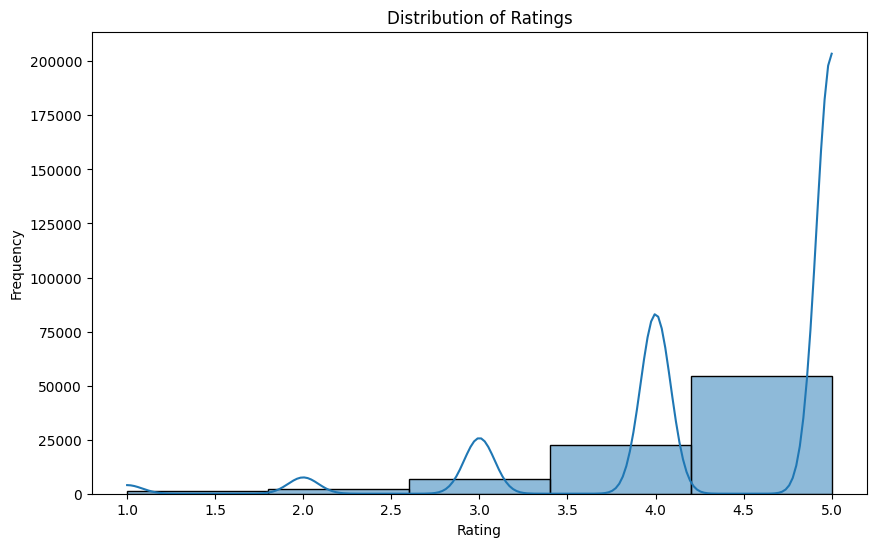

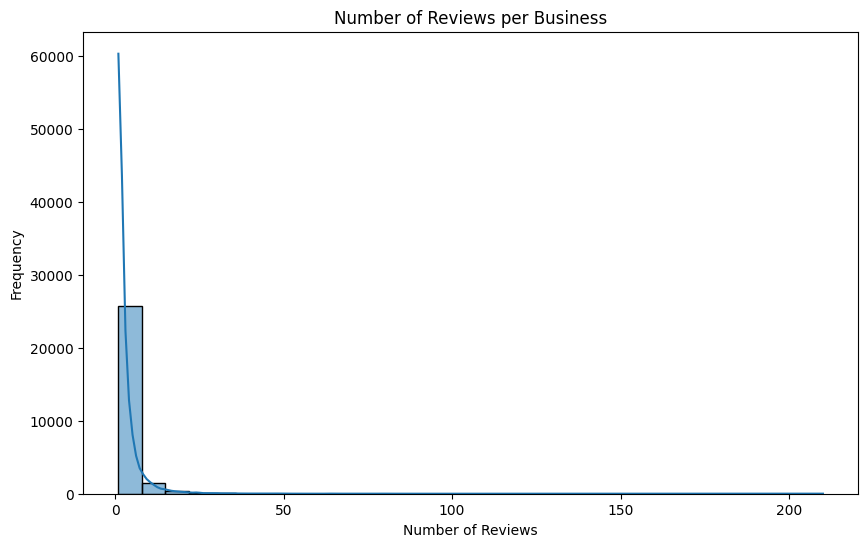

In [ ]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Number of reviews per business
reviews_per_business = df['business_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_business, bins=30, kde=True)
plt.title('Number of Reviews per Business')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

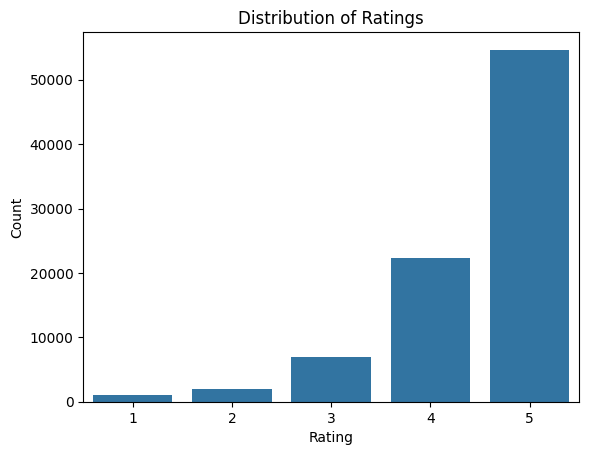

In [ ]:
# Plotting the distribution of ratings
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

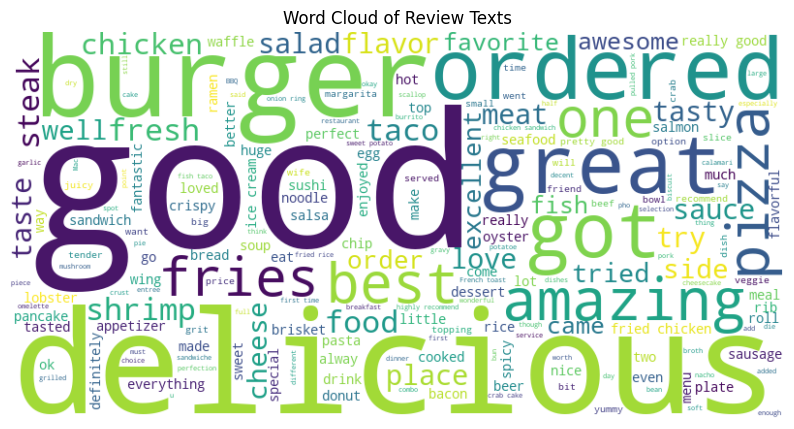

In [8]:
# Generate Word Cloud
text = " ".join(review for review in df.review_text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()